# © Explore Data Science Academy

Honour Code
We {NM_2_Avengers}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract.


# Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Problem Statement</a>

<a href=#three>3. Importing Packages</a>

<a href=#four>4. Loading Data</a>

<a href=#five>5. Data Preprocessing</a>

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Feature Engineering</a>

<a href=#eight>8. Modeling</a>

<a href=#nine>9. Model Performance 

<a id = "one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

If you have ever used a streaming website like Netflix, Showmax, or Youtube, a fter watching a movie, the platform begins suggesting more films and TV series of a similar kind. This is an illustration of a recommendation system. Recommender systems  recognize a user's viewing habits and offer pertinent advice. Recommender systems are economically and socially essential in today's technologically advanced world to enable people to make the best decisions possible regarding the information they consume on a daily basis. This is particularly true in the context of movie recommendations, where clever algorithms may guide viewers toward excellent films among tens of thousands of possibilities.

The task is to develop a collaborative filtering or content-based recommendation algorithm that can correctly forecast how a user would evaluate a film they haven't yet seen based on their past preferences.

Offering a precise and reliable solution to this problem has enormous economic potential since users will receive personalized suggestions, creating platform affinity for streaming services that make it easiest for their audience to watch.

# TEAM

1. THATO RABODIBA
2. KOKETSO MAHLANGU
3. ZITHULELE MANYATHI
4. NONTOKOZO NDLOVU
5. THABATHA NOMPOKO
6. MINENHLE MAPHUMOLO

<a id = "two"></a>
## 2. Problem Statement
<a href=#cont>Back to Table of Contents</a>

The goal is to create a collaborative filtering system or content-based recommendation algorithm that can accurately predict a user's evaluation of a movie they haven't seen based on their past preferences.

In [1]:
#!pip install comet_ml

In [2]:
# import comet_ml at the top of your file
from comet_ml import Experiment


# Setting the API key (saved as environment variable)
experiment = Experiment(
  api_key="h2d2lfNX7NTFfv4141F24E74C",
  project_name="general",
  workspace="proudmamatoboys",
)

C:\Users\zithulele\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/proudmamatoboys/general/801aae9b2da047be95029ff64789f4b1



<a id="three"></a>
## 3. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

In [3]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time



# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))





<a id="four"></a>
## 4. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

### Brief Description of the Datasets
- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

In [4]:
#Reading all the given data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('tags.csv')
imdb = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')

We need to determine the rating score for the respective movieId and submit a csv file in that format for the Kaggle competition. Lets take a look at the features and shape of our training data and a quick look at our movies dataframe.

In [5]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
train.shape

(10000038, 4)

The dataset contains over 10 million observations with 4 columns: User ID, Movie ID, Rating, and Timestamp. All columns have numerical data types, making it suitable for unsupervised learning. However, since the columns are not on the same scale, scaling the data is necessary before applying dimensionality reduction techniques. Due to the large dataset size, processing power requirements will be significant.

In [8]:
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# 5. Data Preprocessing

Movie titles in the dataset are either manually entered or imported from a source like MovieDB. Each title includes the year of release in parentheses, providing additional context about the movie's release date.

In [12]:
movies.info() # Get concise summary of the movie dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [13]:
movies.head() # Get the first 5 observations 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


The dataset comprises 62,423 observations, each representing a movie. The data includes additional information such as movie title and genres. Each line, excluding the header row, follows the format: movieId, title, genres, with genres stored as a pipe-separated list.







The tag genome in this dataset quantifies the strength of specific characteristics exhibited by movies, represented by tags such as "atmospheric," "thought-provoking," "realistic," etc. This genome was generated using a machine learning algorithm on user-contributed content, including tags, ratings, and textual reviews. The process is elaborated further by GroupLens.

In [11]:
genome_scores.info() # Get concise summary of the Genome_tag Dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [16]:
imdb.info() # Get concise of imdb database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [17]:
imdb.head() # Shows the first 5 observations

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


This dataset gives more infomation to about 27000+ movies present in the train dataset. The features are title_cast, director, runtime, budget as well plot_keywords. The title_cast feature describes the most famous/paid actors/actresses in the movie and runtime describes how long movie was and plot_keyword describes the most important key words of the plot

This dataset will be used to train the model.

In [19]:
train.info() # Get the summary of the dataset's metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [20]:
train.isnull().sum() # check if there are any null values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [21]:
train.head() # show the first 5 observations 

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


# 6. Exploratory Data Analysis¶

This section we are doing a further deep analysis of the data and get more insights on the data itself.

6.1 Used Analysis

In [23]:
print('There are ',train["userId"].nunique(), 'users and',train.movieId.nunique(),'movies in the database/dataframe')

There are  162541 users and 48213 movies in the database/dataframe


In [24]:
# Create a Dataframe consisting of the users average rating the give per user and number of times they have rated movies
train1 = pd.DataFrame(train.groupby('userId')['rating'].agg('mean').reset_index())
train1_2 = pd.DataFrame(train.groupby('userId')['rating'].count().reset_index())
# Merge the above to dataframe
train1 = train1.merge(train1_2,on='userId',how = 'left')
# Rename the columns respectively
train1.rename(columns={'rating_x':'avg_rating','rating_y':'number_of_movies'},inplace = True)

# Sort the data in descending of the number of movies the user has rated
train1 = train1.sort_values('number_of_movies', ascending = False)

# Show 5 observations 
train1.head()

,userId,avg_rating,number_of_movies
72314,72315,3.092380,12952
80973,80974,3.277582,3680
137292,137293,3.192168,3588
33843,33844,2.583853,3208
20054,20055,3.179016,3050


C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


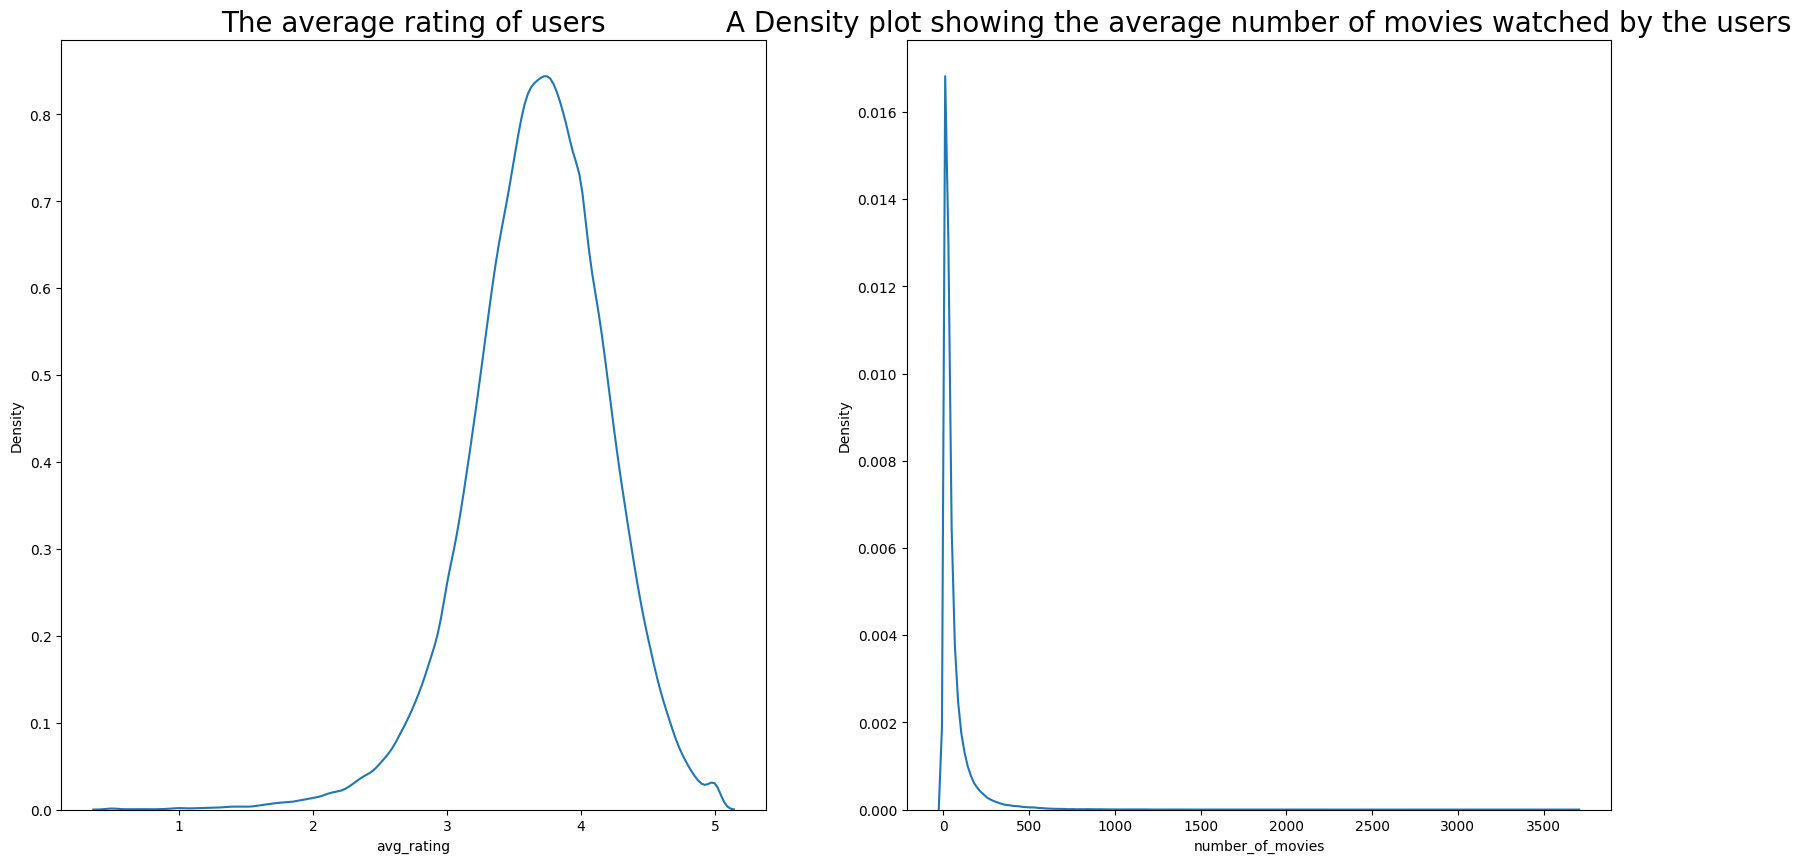

In [25]:
# Initialize the plot with set figure size
fig, ax = plt.subplots(1,2,figsize=(20, 10)) 

# Create a densityplot to visualise the density of the ratings per users
sns.kdeplot(ax=ax[0], x='avg_rating', data=train1) 
ax[0].set_title("The average rating of users",fontsize = 20)

# Set the tick labels to appear in non-scientific form
plt.ticklabel_format(style='plain', axis='y', useOffset=False) 

# Create a KDE plot of the rating the users 
sns.kdeplot(ax=ax[1], x='number_of_movies', data=train1[1:]) 
ax[1].set_title("A Density plot showing the average number of movies watched by the users",fontsize = 20)
    
# Show density plot
plt.show()

The density plots illustrate the typical behavior of users regarding movie ratings. Analysis of two features reveals that approximately 80% of users tend to give an average rating of 3.5 for movies they've watched. This indicates a prevalent tendency among users towards this rating, suggesting a consistent pattern in their rating behavior.

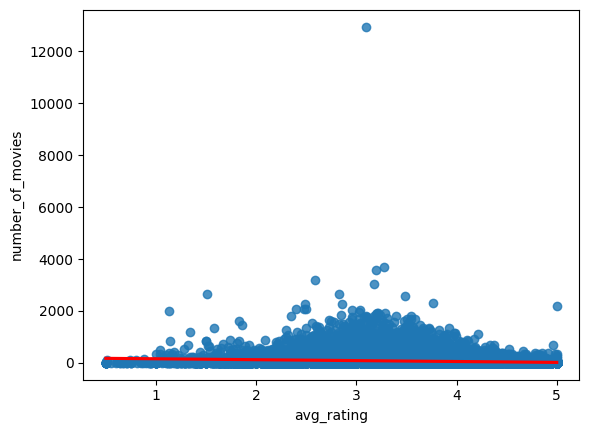

In [26]:
# Check for correlation between average rating and the number of the times have the user has watch a movie

# Create a scatter plot to visualise 
sns.regplot(data = train1, y = "number_of_movies", x = "avg_rating",line_kws={"color": "red"})

# Show the scatterplot
plt.show()

The relationship between average rating and number of movies is observed from above linear dependent. When the user has watched more movies tend give a higher rating.

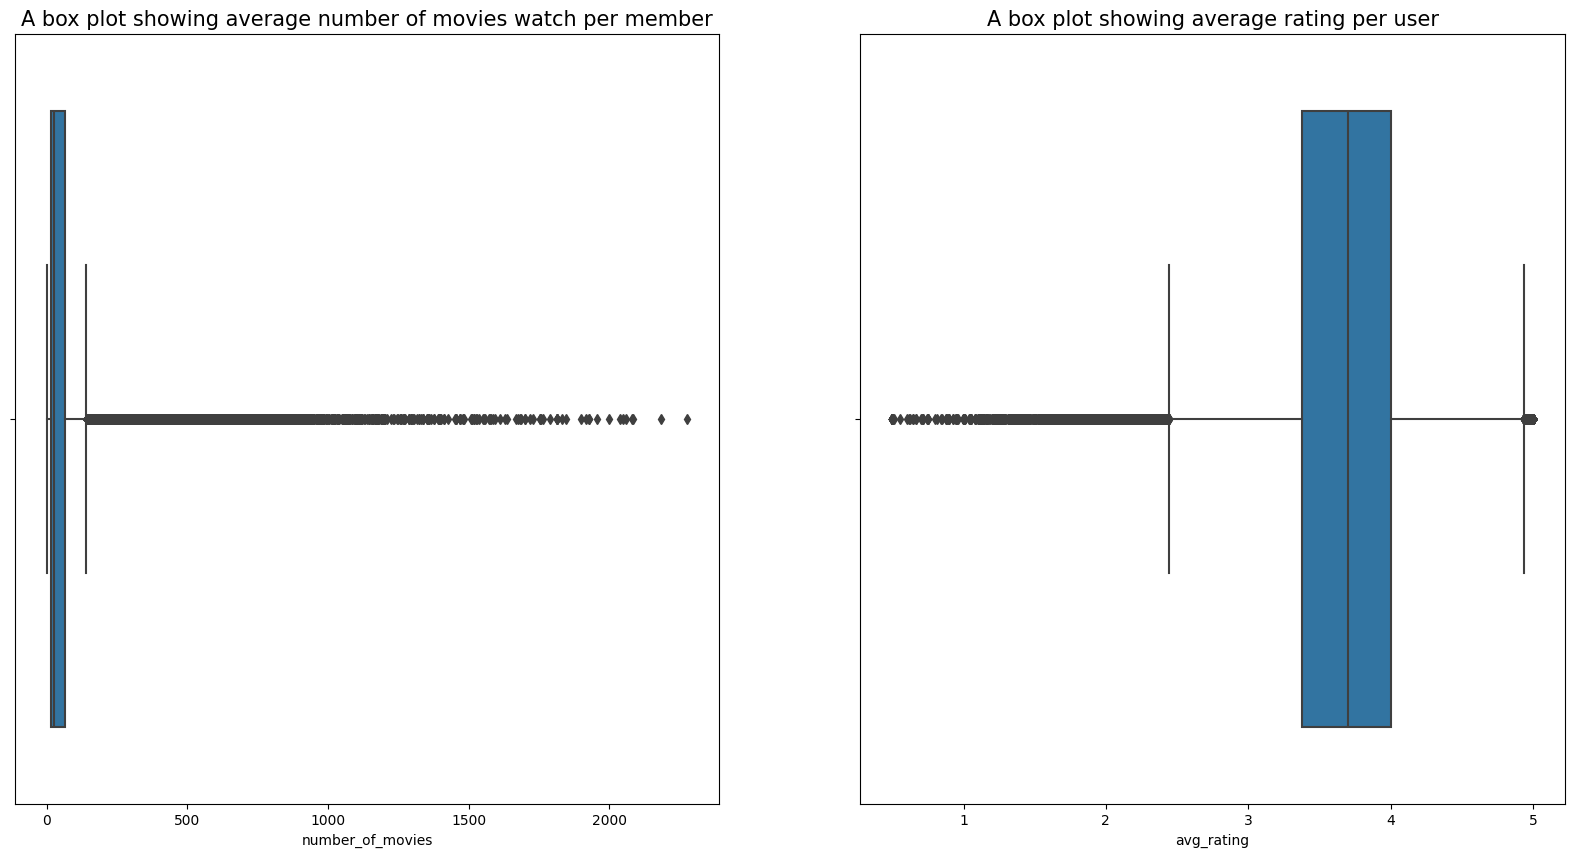

In [27]:
fig,ax = plt.subplots(1,2,figsize = (20,10))


sns.boxplot(ax =ax[0],x = train1.iloc[10:,2])

ax[0].set_title("A box plot showing average number of movies watch per member", fontsize = 15)
sns.boxplot(ax = ax[1],x = train1.iloc[10:,1] )

ax[1].set_title("A box plot showing average rating per user", fontsize = 15)
plt.show()

What is observed from all the plots is that mosts users have watched less than 500 movies and that most users gave average rating of 3.5 for all the movies they have watched. There is also a high presence of outliers in the data which might be explained in investigating other features.

7.2 Rating analysis

The train dataset gives an overview of how each user rated each movie. What was observed that each user can rate a movie from 0.5 (Worst) to 5.0 (Best). Here is the full detailed scale:

0.5 - Very Bad
1.0 - Bad
1.5 - Moderately Bad
2.0 - Not that Bad
2.5 - Less than average
3.0 - Average
3.5 - Above than average
4.0 - Good
4.5 - Very Good
5.0 - Excellent

In [29]:
train.rating.value_counts()

rating
4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: count, dtype: int64

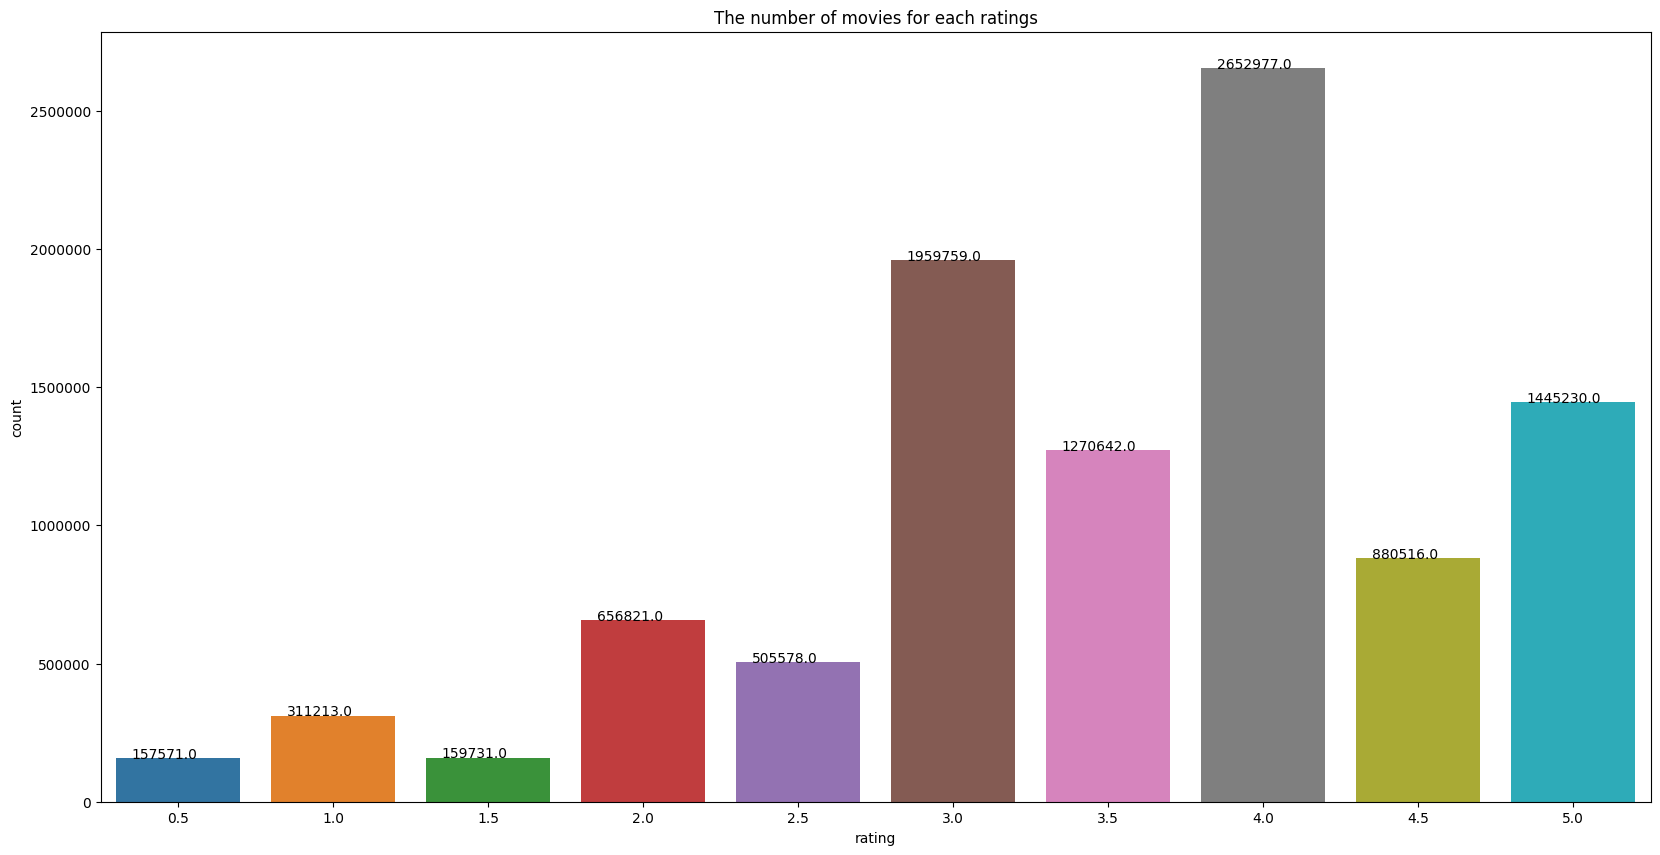

In [31]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(20, 10)) # Initialize the plot with set figure size

sns.countplot(ax=ax, x='rating', data=train) # Create a countplot to visualise the number of movies per category
ax.set_title("The number of movies for each ratings")
plt.ticklabel_format(style='plain', axis='y', useOffset=False) # Set the tick labels to appear in non-scientific form

# Make the counts appear on the different
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
# Show the countplot
plt.show()

From the countplot, 60579966 movies in the dataset where rated 3.0 or above where most were rated given the rating of 4.0. Most of the movies in the data were very good considering the amount of movies that were rated 4.0 or above. With further scrutiny of the data, the observations acquired from the above chart will be explained in the next incoming sections.

In [34]:
train_movies = train.merge(movies,on = 'movieId') # Merges the movie and train datasets
train_movies.drop(columns=['timestamp'],inplace=True) # Dropping the timestamp column
train_movies.head(10) # Shows the first 10 observations

,userId,movieId,rating,title,genres
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
3,106362,32296,2.0,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller
5,120949,81768,3.0,"Man Who Could Work Miracles, The (1936)",Comedy|Fantasy
6,19630,62049,4.0,1984 (1956),Drama|Sci-Fi
7,21066,2282,1.0,Pecker (1998),Comedy|Drama
8,117563,120474,4.0,Toy Story That Time Forgot (2014),Animation|Children
9,144018,1997,5.0,"Exorcist, The (1973)",Horror|Mystery


7.3 Year analysis

In [47]:
movies = movies.copy() # Create a new copy of the Movies dataframe

train3['genres'] = train3.genres.str.split('|')
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
train3['year'] = train3.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
train3['year'] = train3.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
train3['title'] = train3.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
train3['title'] = train3['title'].apply(lambda x: x.strip())

train3.head() # Show the first 5 observations

,userId,movieId,rating,title,genres,year
0,5163,57669,4.0,In Bruges (2008),NaN,2008
1,106343,5,4.5,Father of the Bride Part II (1995),NaN,1995
2,146790,5459,5.0,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,NaN,2002
3,106362,32296,2.0,Miss Congeniality 2: Armed and Fabulous (2005),NaN,2005
4,9041,366,3.0,Wes Craven's New Nightmare (Nightmare on Elm S...,NaN,1994


In [48]:
train3.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 48203 entries, 0 to 9998628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   48203 non-null  int64  
 1   movieId  48203 non-null  int64  
 2   rating   48203 non-null  float64
 3   title    48203 non-null  object 
 4   genres   0 non-null      float64
 5   year     47964 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.6+ MB


In [49]:
train3.isnull().sum()

userId         0
movieId        0
rating         0
title          0
genres     48203
year         239
dtype: int64

After extracting the release years , the year feature as observed from above is in the wrong in the wrong datatype and cosists of null values.

In [50]:
train3['year'] = pd.to_numeric(train3['year'], errors='coerce')  # Change the year feature to a numeric feature 
train3 = train3.dropna(subset=['year']) # Drop all the rows that have null entries in the years 
train3['year'] = train3['year'].astype(int) # Change the datatype of the year into int
train3.info() # Show the metadata of the movies dataframe 


<class 'pandas.core.frame.DataFrame'>
Index: 47964 entries, 0 to 9998628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   47964 non-null  int64  
 1   movieId  47964 non-null  int64  
 2   rating   47964 non-null  float64
 3   title    47964 non-null  object 
 4   genres   0 non-null      float64
 5   year     47964 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.4+ MB


In [51]:
train3.isnull().sum()

userId         0
movieId        0
rating         0
title          0
genres     47964
year           0
dtype: int64

The year feature that was generated is in the right datatype and we can now use the year feature analysis.

In [52]:
# Sort the DataFrame by the years 
train3 = train3.sort_values('year',ascending=True).reset_index()

# Show first 5 observations from DataFrame
train3.head()

,index,userId,movieId,rating,title,genres,year
0,6084059,49119,148054,4.0,Passage de Venus (1874),NaN,1874
1,1543753,34334,148048,0.5,Sallie Gardner at a Gallop (1878),NaN,1878
2,3697807,147677,166800,3.0,Buffalo Running (1883),NaN,1883
3,1104471,150748,148040,1.5,Man Walking Around a Corner (1887),NaN,1887
4,1937178,75589,180503,2.5,Pferd und Reiter Springen Über ein Hindernis (...,NaN,1888


In [53]:
def get_Decade_df():
    """
    """
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    count5 = 0
    count6 = 0
    count7 = 0
    count8 = 0
    count9 = 0
    count10 = 0
    count11 = 0
    counts = []
    # Create a for loop access every row we can divide the data accordingly.
    for i in range(len(train3)) :
        if (train3.loc[i,'year'] >= 1800 and train3.loc[i,'year'] < 1900):
            count1 = count1 + 1
        elif (train3.loc[i,'year'] >= 1900 and train3.loc[i,'year'] < 1920):
            count2 = count2 +1
        elif (train3.loc[i,'year'] >= 1920 and train3.loc[i,'year'] < 1940):
            count3 = count3 + 1
        elif (train3.loc[i,'year'] >= 1940 and train3.loc[i,'year'] < 1960):
            count4 = count4 + 1
        elif (train3.loc[i,'year'] >= 1960 and train3.loc[i,'year'] < 1970):
            count5 = count5 + 1
        elif (train3.loc[i,'year'] >= 1970 and train3.loc[i,'year'] < 1980):
            count6 = count6 + 1
        elif (train3.loc[i,'year'] >= 1980 and train3.loc[i,'year'] < 1990):
            count7 = count7 + 1
        elif (train3.loc[i,'year'] >= 1990 and train3.loc[i,'year'] < 2000):
            count8 = count8 + 1
        elif (train3.loc[i,'year'] >= 2000 and train3.loc[i,'year'] < 2010):
            count9 = count9 + 1  
        else:
            count10 = count10 + 1
#counts.extend([count1,count11])
    counts.extend([count1,count2,count3,count4,count5,count6,count7,count8,count9,count10])
    return counts

counts = get_Decade_df()

In [54]:
years  = [     '1800 - 1899',
               '1900 - 1919',
               '1920 - 1939',
               '1940 - 1959',
               '1960 - 1969',
               '1970 - 1979',
               '1980 - 1989',
               '1990 - 1999',
               '2000 - 2009',
               '2010 - till date']


counts_dict = {'era':years,
                'count':counts}
counts_df = pd.DataFrame(counts_dict)
counts_df 

,era,count
0,1800 - 1899,100
1,1900 - 1919,294
2,1920 - 1939,1695
3,1940 - 1959,3542
4,1960 - 1969,2592
5,1970 - 1979,3439
6,1980 - 1989,4026
7,1990 - 1999,5462
8,2000 - 2009,10570
9,2010 - till date,16244


Since we obtained the correct dataset to see the trend between the decades of the movie ratings and the genres.

C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zithulele\AppData\Local\Temp\ipykernel_548\1232284620.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(years,rotation = 20, ha="right")


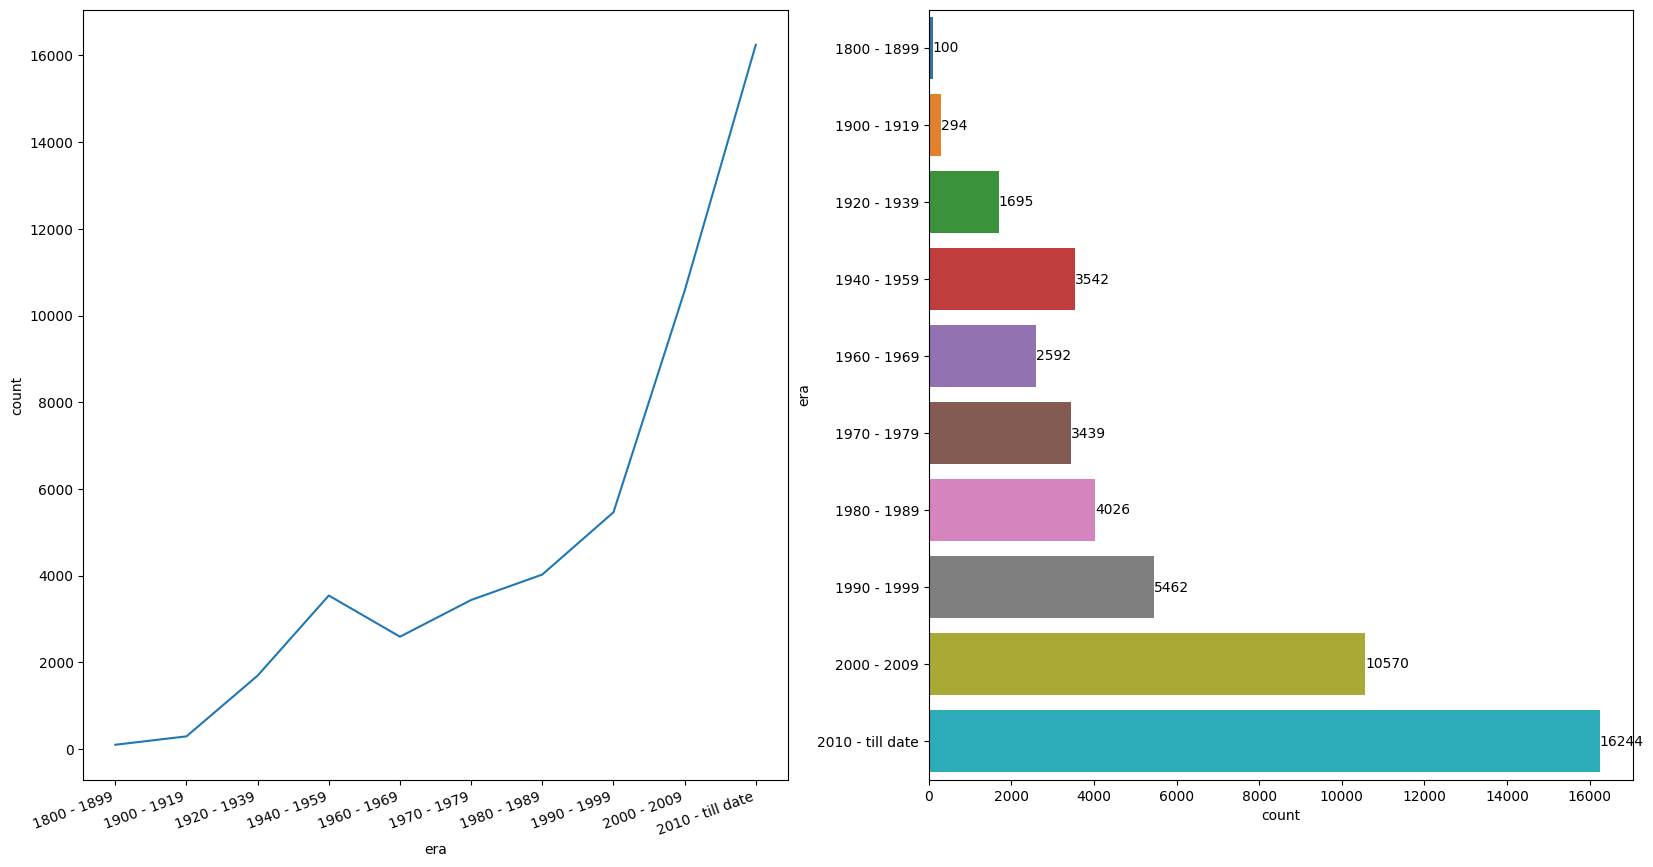

In [55]:
# Plotting the graph
fig, ax = plt.subplots(1,2,figsize=(20, 10)) # Initialize the plot with set figure size

# Create a lineplot to visualise the trend per 10 year period
sns.lineplot(ax=ax[0], x='era',y = 'count',data=counts_df)

# Fix x tick labels for readability  
ax[0].set_xticklabels(years,rotation = 20, ha="right")

# Create a barplot to visualise the how many movies were released per 10 year period 
sns.barplot(ax=ax[1], y = 'era',x = 'count', data = counts_df)
# Labeling the bars on the bar plot
for container in ax[1].containers:
    ax[1].bar_label(container)

# Show the barplot
plt.show()

From both plots, it is observed that more movies have been released as we progressed with in 20th century with biggest increase from the 1970s to the 1990s. This could be because the increas in technological advancements and more people having access to the entertainment. The early 2000s is when the most movies were released.



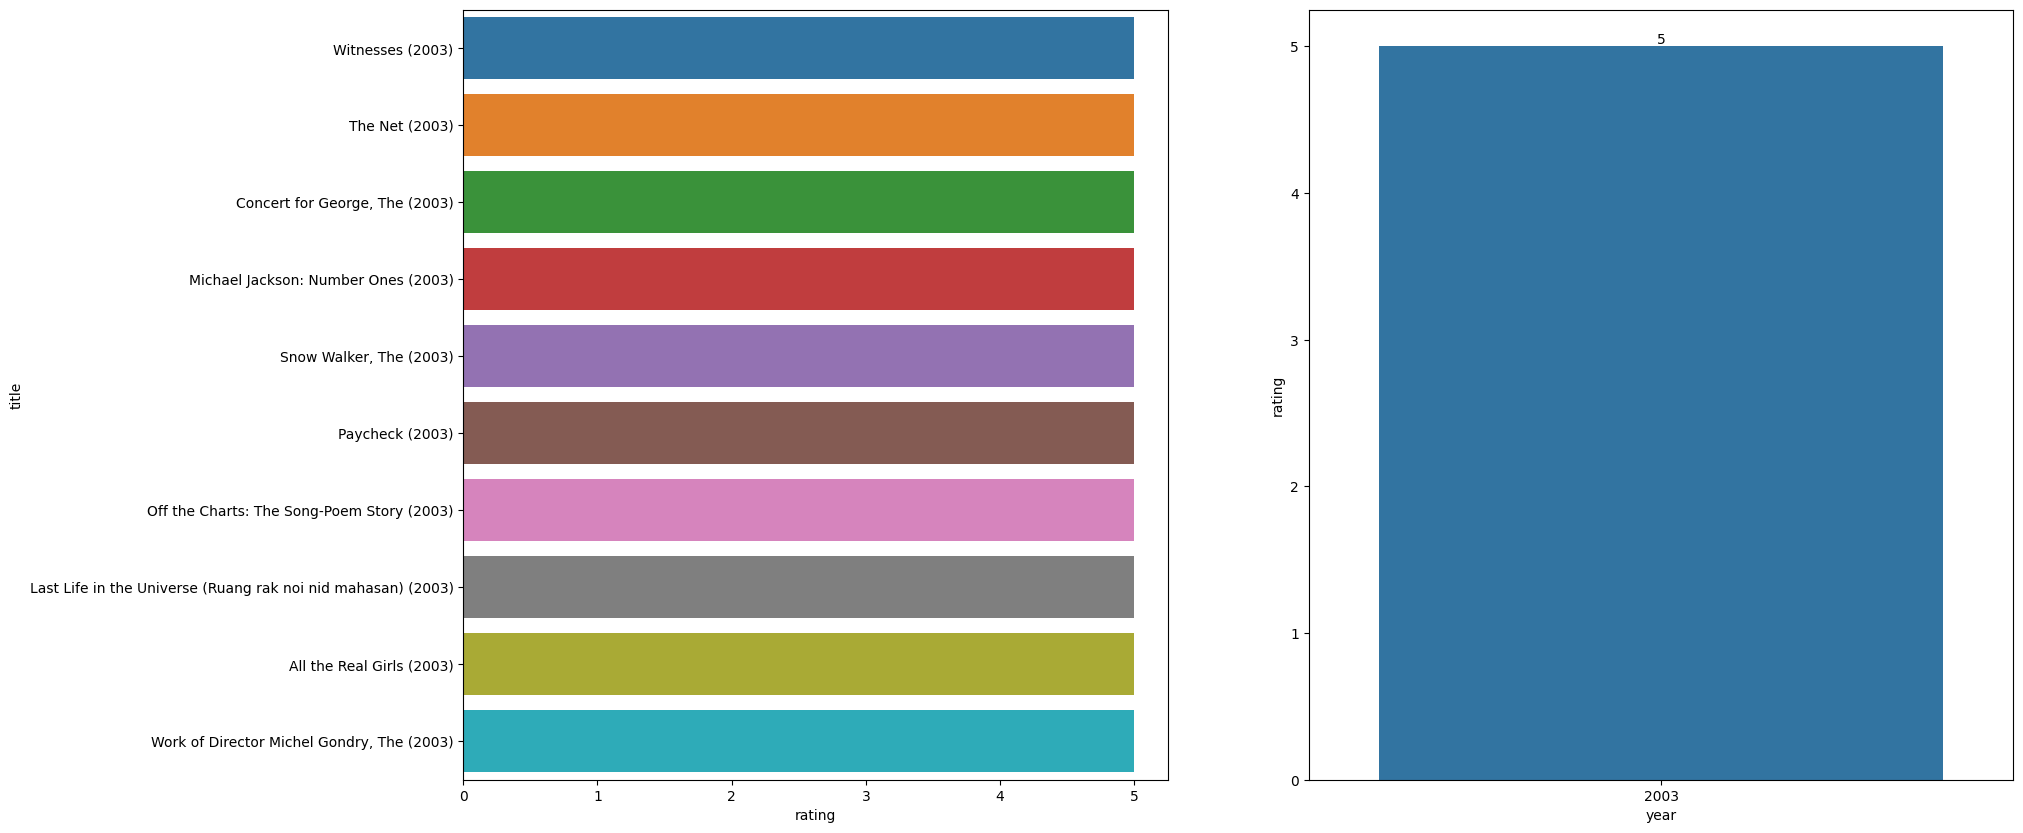

In [57]:
# Plotting the graph
fig, ax = plt.subplots(1,2,figsize=(20, 10)) # Initialize the plot with set figure size

# Create a lineplot to visualise the trend per 10 year period
sns.barplot(ax=ax[0], x='rating',y = 'title',data=train5.head(10))

# Create a barplot to visualise the how many movies were released per 10 year period 
sns.barplot(ax=ax[1], y = 'rating',x = 'year', data = train5.head(10))
# Labeling the bars on the bar plot
for container in ax[1].containers:
    ax[1].bar_label(container)



# Show the barplot
plt.show()

6.4 Genres analysis

Lets create a dataframe of the different movie genres.¶

In [59]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


Let us take a look at a world cloud of the different genres.

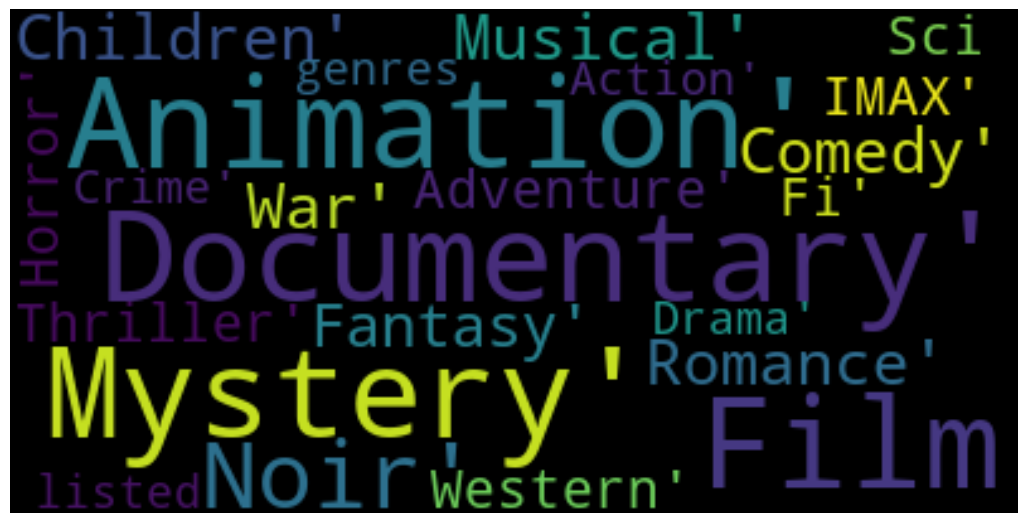

In [60]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
gen = movies_genres['genres'].explode()
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

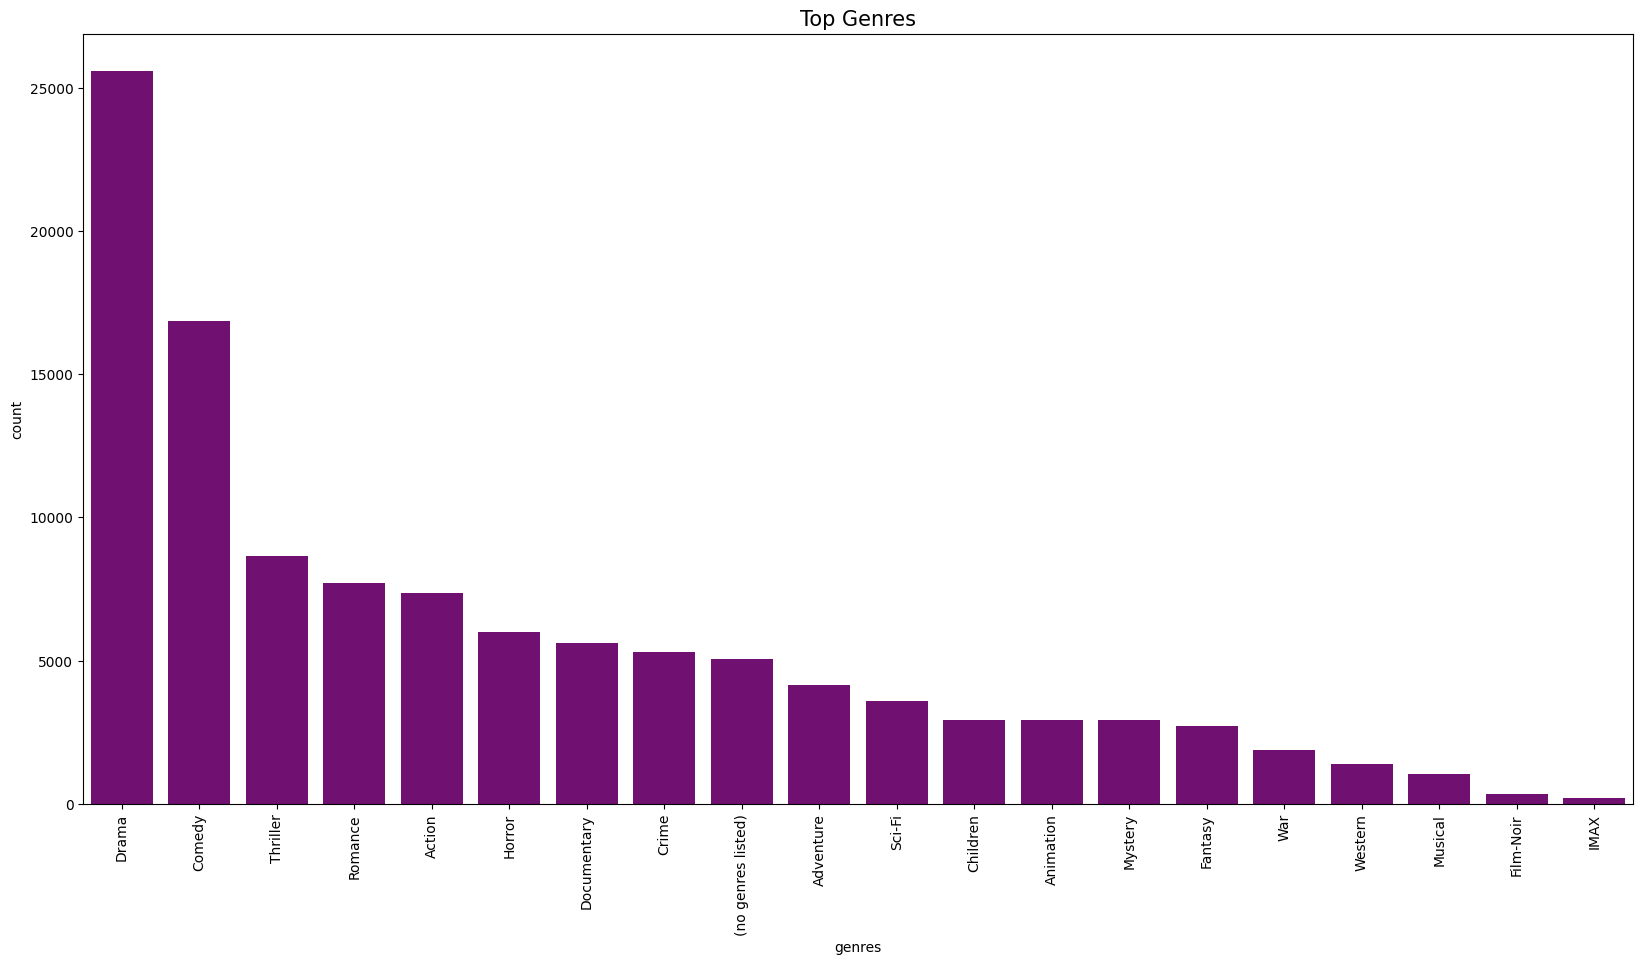

In [61]:
# Ploting top genres in the Dataset
plt.figure(figsize=(20, 10))
gen = movies_genres['genres'].explode()
ax=sns.countplot(x=gen, order=gen.value_counts().index[:30],color='purple')
ax.set_title('Top Genres', fontsize=15)
plt.xticks(rotation =90)
plt.style.use("dark_background")
plt.show()

Drama and Comedy are the most popular genres, followed by Thriller and Romance. We need to keep in mind that the movies could have multiple genres.

C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When gro

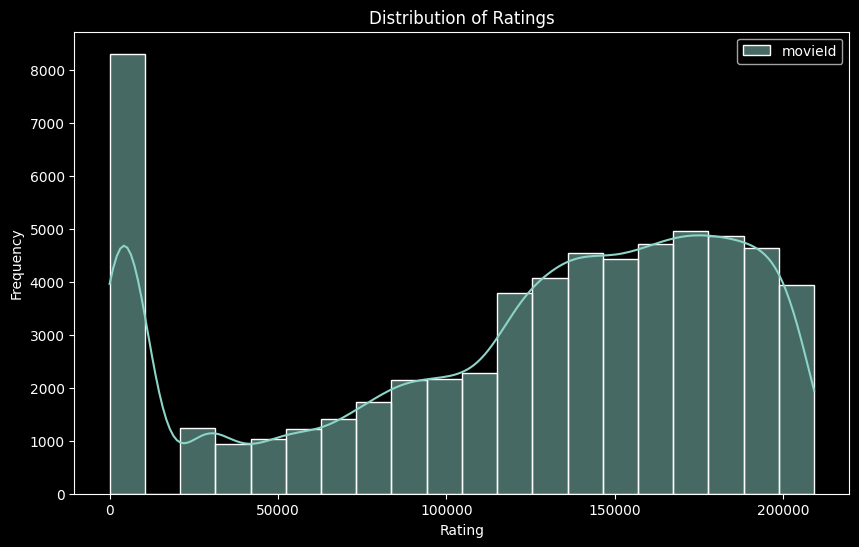

In [62]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies, kde=True, bins=20, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When gro

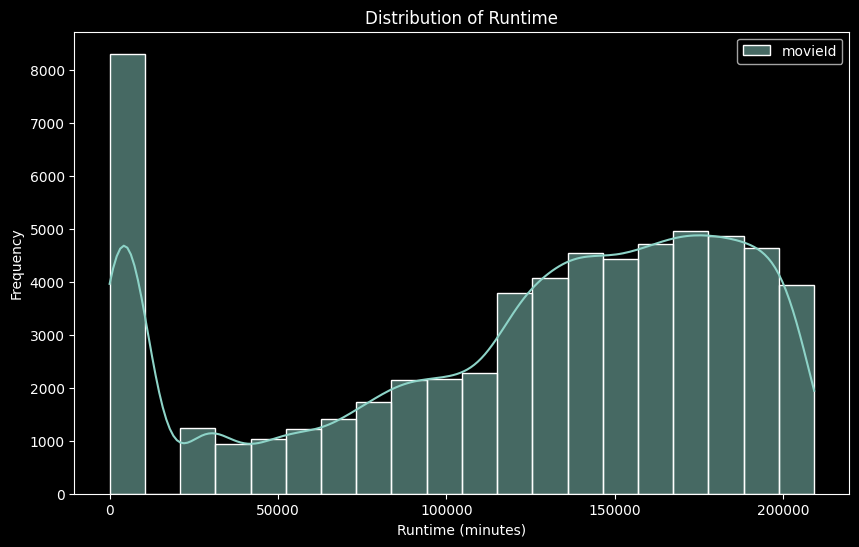

In [63]:
# Distribution of Runtime
plt.figure(figsize=(10, 6))
sns.histplot(movies, kde=True, bins=20, color='orange')
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

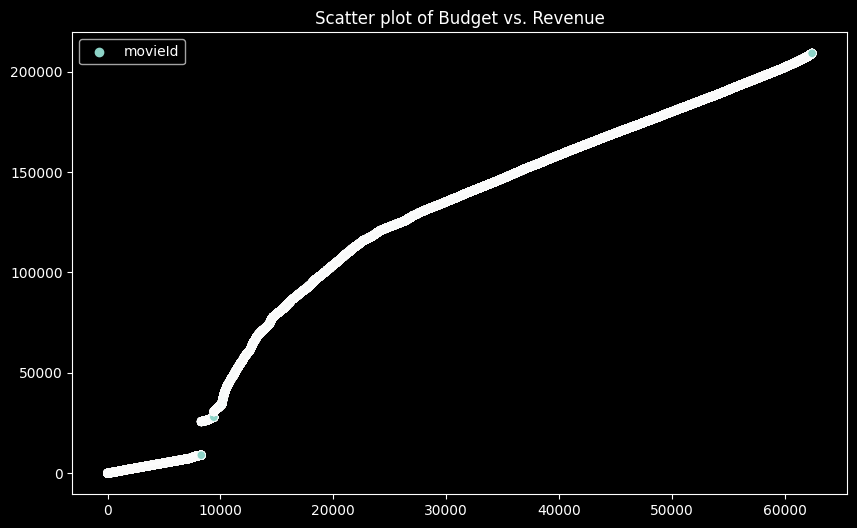

In [64]:
# Revenue vs. Budget Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, color='green')
plt.title('Scatter plot of Budget vs. Revenue')
plt.show()

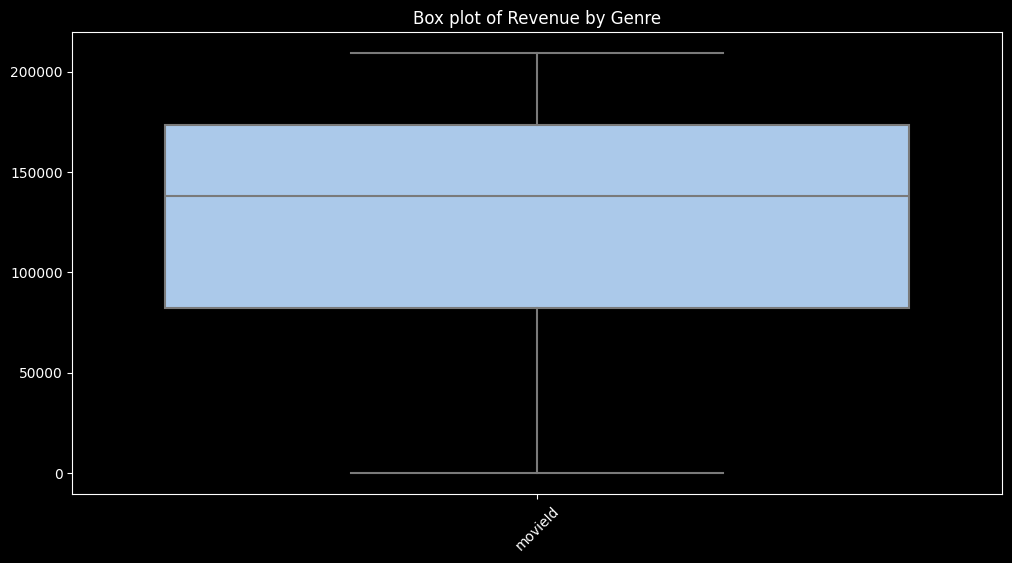

In [65]:
# Revenue by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=movies, palette='pastel')
plt.title('Box plot of Revenue by Genre')
plt.xticks(rotation=45)
plt.show()

C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


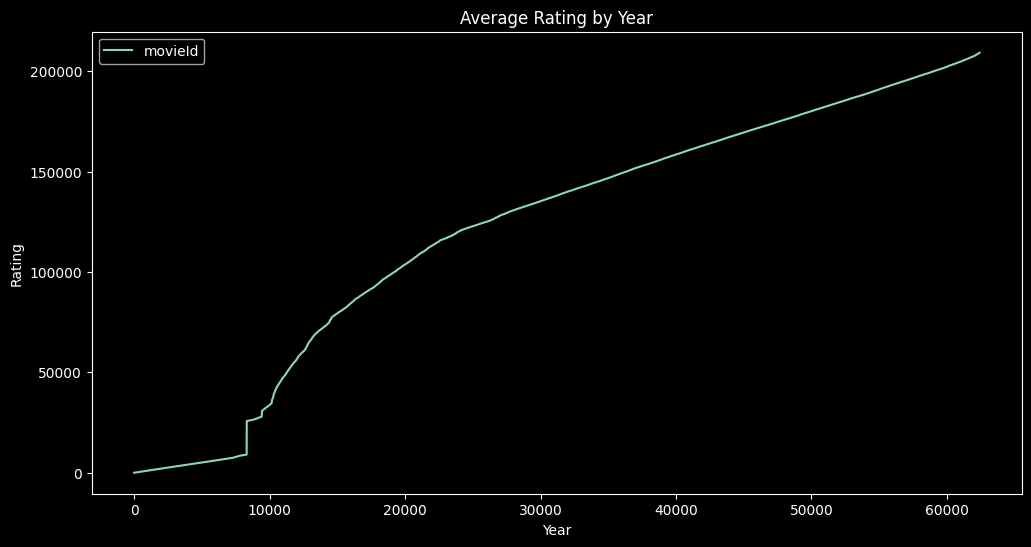

In [66]:
# Rating by Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies, color='red')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

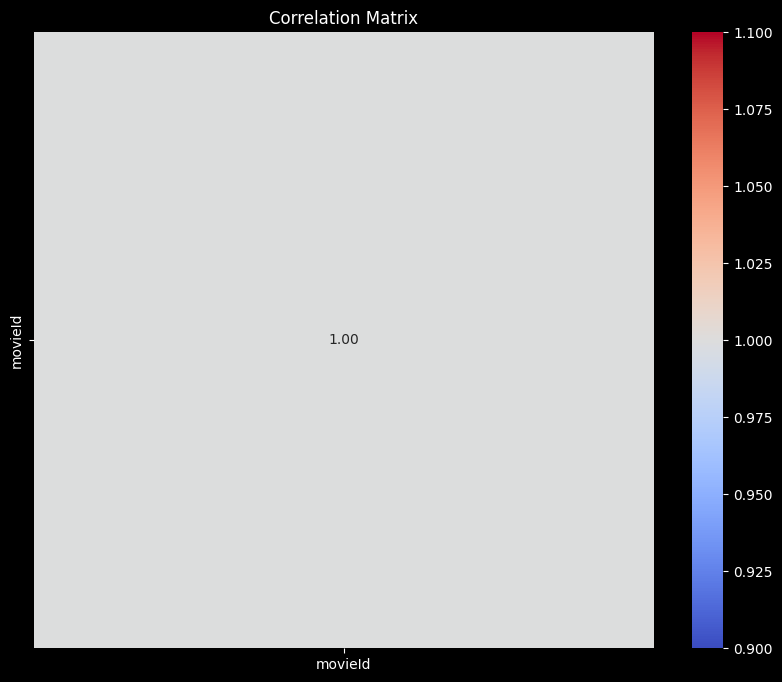

In [67]:
# Exclude non-numeric columns
numeric_columns = movies.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
